# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [8]:
import pandas as pd
from pandas import ExcelFile
%matplotlib inline
#!pip install xlrd

    100% |████████████████████████████████| 112kB 3.9MB/s ta 0:00:01
You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*. You might need to restart your kernel afterward!

In [10]:
df = pd.read_excel("richpeople.xlsx")
df

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
2,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN
5,2014,Abigail Johnson,50,United States,USA,17.3,inherited,inherited,female,52.0,...,relation,1946.0,NaN,money management,3rd generation,no male siblings,"http://en.wikipedia.org/wiki/Edward_Johnson,_III",https://www.fidelity.com/about-fidelity/our-he...,NaN,NaN
6,2014,Abilio dos Santos Diniz,609,Brazil,BRA,2.8,inherited,inherited,male,77.0,...,relation,1948.0,NaN,retail,"kidnapped for 6 days in 1989, inherited from f...",NaN,http://en.wikipedia.org/wiki/Ab%C3%ADlio_Diniz,http://www.forbes.com/profile/abilio-dos-santo...,NaN,NaN
7,2014,Achmad Hamami,1092,Indonesia,IDN,1.6,self-made,founder non-finance,male,83.0,...,founder,1980.0,NaN,heavy equipment,NaN,NaN,http://www.forbes.com/profile/achmad-hamami/,http://www.trakindo.co.id/website/pages/compan...,NaN,NaN
8,2014,Adi Godrej,446,India,IND,3.5,inherited,inherited,male,71.0,...,relation,1897.0,NaN,consumer goods,3rd generation,NaN,http://en.wikipedia.org/wiki/Godrej_family,http://www.forbes.com/profile/godrej/,NaN,NaN
9,2014,Aerin Lauder Zinterhofer,1465,United States,USA,1.1,inherited,inherited,female,44.0,...,relation,1946.0,NaN,"inherited, cosmetics",3rd generation,NaN,http://en.wikipedia.org/wiki/Jane_Lauder,http://investing.businessweek.com/research/sto...,NaN,NaN


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [11]:
df.shape

(1653, 30)

In [12]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [17]:
df[['name', 'networthusbillion']].sort_values(by='networthusbillion', ascending=False).head(10)

,name,networthusbillion
184,Bill Gates,76.0
226,Carlos Slim Helu,72.0
79,Amancio Ortega,64.0
1562,Warren Buffett,58.2
862,Larry Ellison,48.0
339,David Koch,40.0
247,Charles Koch,40.0
1364,Sheldon Adelson,38.0
280,Christy Walton,36.7
724,Jim Walton,34.7


## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [24]:
df.gender.value_counts()


male      1473
female     180
Name: gender, dtype: int64

In [45]:

percent_men = 100*df.gender.value_counts().head(1)/(df.shape[0])

percent_women = 100*df.gender.value_counts().head(2)/(df.shape[0])

print(percent_men)

print(percent_women)

male    89.110708
Name: gender, dtype: float64
male      89.110708
female    10.889292
Name: gender, dtype: float64


In [ ]:
df[['gender', 'networthusbillion']].groupby(by='gender').mean()

## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [53]:
df.sourceofwealth.value_counts().head(1)

real estate    107
Name: sourceofwealth, dtype: int64

In [71]:
df[df.gender == 'male'].sourceofwealth.value_counts()#

real estate                            100
retail                                  60
diversified                             60
investments                             58
pharmaceuticals                         40
hedge funds                             34
banking                                 30
construction                            27
media                                   18
software                                18
private equity                          16
finance                                 15
consumer goods                          14
manufacturing                           12
steel                                   11
telecom                                 10
electronics                              9
mining                                   9
education                                8
money management                         8
insurance                                8
chemicals                                8
Facebook                                 8
oil        

In [69]:
df[df.gender == 'female'].sourceofwealth.value_counts()
#df.groupby(by='gender').sourceofwealth.value_counts()

diversified                    9
real estate                    7
media                          6
consumer goods                 5
construction                   5
hotels, investments            5
cleaning products              4
casinos                        4
chemicals                      4
Wal-Mart                       4
commodities                    3
Samsung                        3
pipelines                      3
packaging                      3
mining                         3
retail                         3
banking                        3
investments                    2
Cargill Inc.                   2
pharmaceuticals                2
Campbell Soup                  2
publishing                     2
paper                          2
financial services             2
banking inheritance            2
bank, media                    2
coffee                         2
steel                          2
inherited, cosmetics           2
insurance                      2
          

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

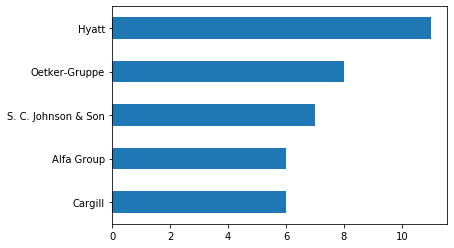

In [128]:
df.company.value_counts().head(5).sort_values().plot(kind='barh')

In [124]:
sort_values()

#inplace=True
#why is this upside down?

Object `sort_values` not found.


## 7) How much money do these billionaires have in total?

In [72]:
df.networthusbillion.sum()

6454.400000000001

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [90]:
df.groupby(by='countrycode').networthusbillion.sum().sort_values(ascending=False).head(10)

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [91]:
df.age.mean()

63.34213836477988

In [92]:
df.groupby(by='selfmade').age.mean()

selfmade
inherited    64.962185
self-made    62.625899
Name: age, dtype: float64

## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

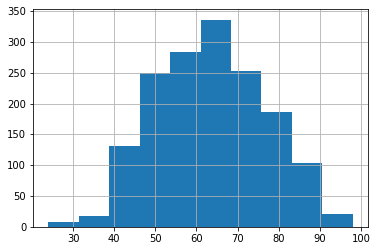

In [98]:
df.age.hist()
#does this need names?

## 11) Make a scatterplot of net worth compared to age

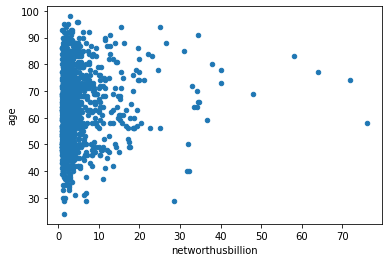

In [99]:
df.plot(x='networthusbillion', y='age', kind='scatter')

## 12) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

In [100]:
df[['name', 'networthusbillion']].sort_values(by='networthusbillion', ascending=False).head(10)

,name,networthusbillion
184,Bill Gates,76.0
226,Carlos Slim Helu,72.0
79,Amancio Ortega,64.0
1562,Warren Buffett,58.2
862,Larry Ellison,48.0
339,David Koch,40.0
247,Charles Koch,40.0
1364,Sheldon Adelson,38.0
280,Christy Walton,36.7
724,Jim Walton,34.7


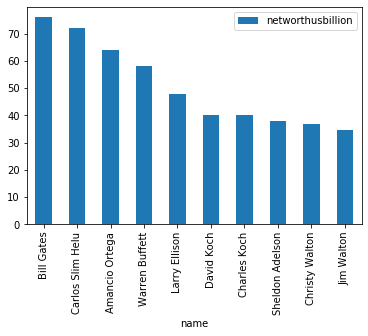

In [136]:
df[['name', 'networthusbillion']].sort_values(by='networthusbillion', ascending =False).head(10).plot(x ='name', y='networthusbillion',kind='bar')


In [ ]:
#df[['name', 'networthusbillion']].sort_values(by='networthusbillion', ascending =False).head(10).plot(x ='name', y='networthusbillion',kind='barh')
